In [2]:
from google.colab import files

uploaded = files.upload()

Saving emotion2.zip to emotion2.zip


In [3]:
import zipfile
import io

uploaded_file_name = next(iter(uploaded))
zip_ref = zipfile.ZipFile(io.BytesIO(uploaded[uploaded_file_name]), 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import cv2

def load_images(path):
    emotions = {'angry': 0, 'laugh': 1, 'sad': 2, 'surprised': 3}
    images = []
    labels = []
    for emotion in emotions:
        print('loading', path, emotion, emotions[emotion])
        path_dir = path + '/' + emotion
        file_list = os.listdir(path_dir)
        for file_name in file_list:
            img_path = path_dir + '/' + file_name
            image = cv2.imread(img_path)

            if image is None:
                print(f"Error loading image: {img_path}")
                continue

            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (150, 150))
            images.append(image)
            labels.append(emotions[emotion])

    print('image count', len(images))
    return images, labels

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

np.random.seed(0)
tf.random.set_seed(0)

train_dir = './train'
test_dir = './test'

x_train, y_train = load_images(train_dir)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train/255.0
x_train, y_train = shuffle(x_train, y_train, random_state=0)

loading ./train angry 0
loading ./train laugh 1
loading ./train sad 2
loading ./train surprised 3
image count 600


In [6]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
19/19 [==============================] - 22s 1s/step - loss: 2.2231 - accuracy: 0.2600
Epoch 2/10
19/19 [==============================] - 20s 1s/step - loss: 1.3761 - accuracy: 0.3167
Epoch 3/10
19/19 [==============================] - 19s 995ms/step - loss: 1.2990 - accuracy: 0.4467
Epoch 4/10
19/19 [==============================] - 18s 975ms/step - loss: 1.0740 - accuracy: 0.5900
Epoch 5/10
19/19 [==============================] - 20s 1s/step - loss: 0.7731 - accuracy: 0.7583
Epoch 6/10
19/19 [==============================] - 18s 956ms/step - loss: 0.4646 - accuracy: 0.8833
Epoch 7/10
19/19 [==============================] - 18s 944ms/step - loss: 0.2450 - accuracy: 0.9317
Epoch 8/10
19/19 [==============================] - 18s 943ms/step - loss: 0.1107 - accuracy: 0.9850
Epoch 9/10
19/19 [==============================] - 19s 987ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 10/10
19/19 [==============================] - 20s 1s/step - loss: 0.0191 - accuracy: 0.9983


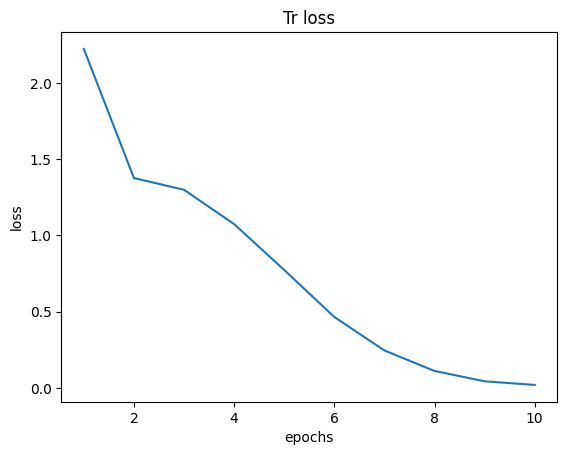

In [7]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.title("Tr loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss)
plt.show()

loading ./test angry 0
Error loading image: ./test/angry/21.avif
loading ./test laugh 1
loading ./test sad 2
loading ./test surprised 3
image count 399
13/13 [==============================] - 3s 216ms/step - loss: 1.3323 - accuracy: 0.6892
손실값: 1.332268238067627
예측 정확도: 0.689223051071167
1/1 [==============================] - 0s 38ms/step
0 : 분노 / 1 : 기쁨 / 2 : 슬픔 / 3 : 놀람
정답: 2
예측: 2
예측 결과: 슬픔


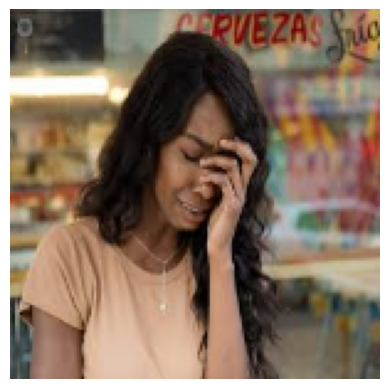

1/1 [==============================] - 0s 35ms/step
0 : 분노 / 1 : 기쁨 / 2 : 슬픔 / 3 : 놀람
정답: 2
예측: 2
예측 결과: 슬픔


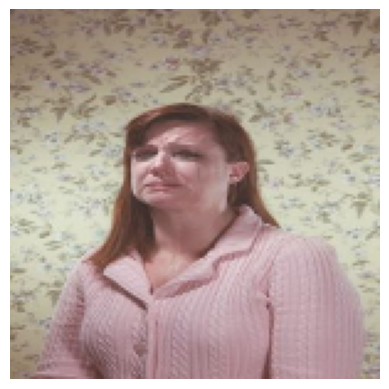

1/1 [==============================] - 0s 38ms/step
0 : 분노 / 1 : 기쁨 / 2 : 슬픔 / 3 : 놀람
정답: 1
예측: 1
예측 결과: 기쁨


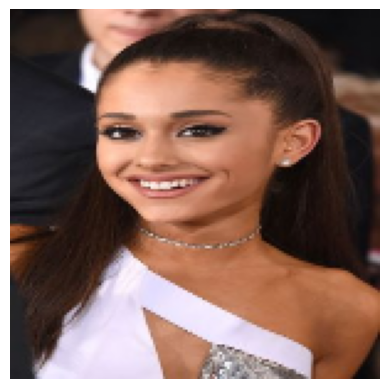

1/1 [==============================] - 0s 33ms/step
0 : 분노 / 1 : 기쁨 / 2 : 슬픔 / 3 : 놀람
정답: 0
예측: 0
예측 결과: 분노


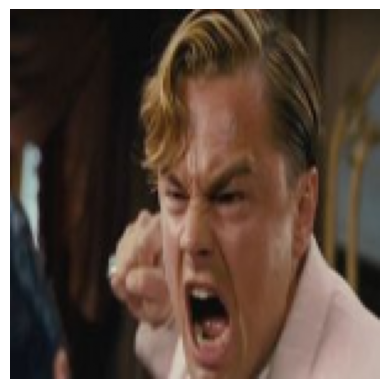

1/1 [==============================] - 0s 33ms/step
0 : 분노 / 1 : 기쁨 / 2 : 슬픔 / 3 : 놀람
정답: 1
예측: 1
예측 결과: 기쁨


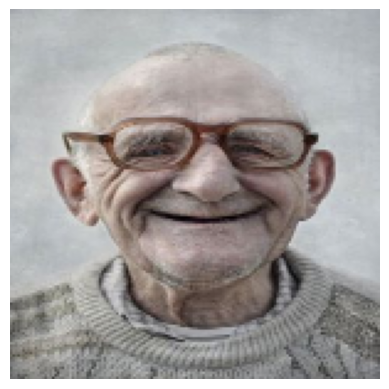

In [11]:
import random

x_test, y_test = load_images(test_dir)
x_test = np.array(x_test)
x_test = x_test/255.0
y_test = np.array(y_test)

loss_value, accuracy = model.evaluate(x_test,y_test)
print('손실값:',loss_value)
print('예측 정확도:', accuracy)

for _ in range(5):
    random_number = random.randint(1, len(x_test))
    label = y_test[random_number]
    image = x_test[random_number]
    prd = model.predict(np.expand_dims(image, axis=0)).argmax(axis=1)

    print('0 : 분노 / 1 : 기쁨 / 2 : 슬픔 / 3 : 놀람')
    print('정답:', label)
    print('예측:', prd[0])

    if prd[0] == 0:
        print('예측 결과: 분노')
    elif prd[0] == 1:
        print('예측 결과: 기쁨')
    elif prd[0] == 2:
        print('예측 결과: 슬픔')
    elif prd[0] == 3:
        print('예측 결과: 놀람')

    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.show()